In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm

In [3]:
data = pd.read_csv('/Users/ram/Desktop/K2DataScience/HR_comma_sep.csv', low_memory = False)
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [15]:

data.mean()


satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [16]:
data.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [31]:
#Question # 1 Which variables may be approximately normal?
var_nor = data[['satisfaction_level','last_evaluation','average_montly_hours']]

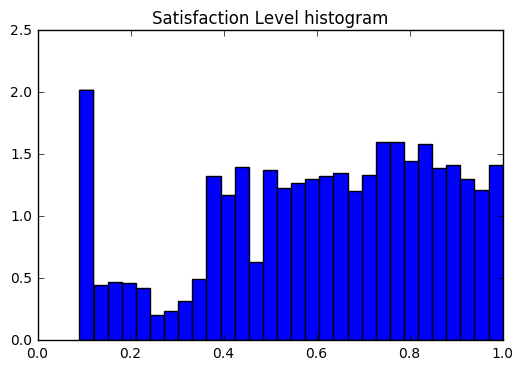

In [34]:
#Question # 2 For the variables in part 1, plot some histograms.

fig, axes = plt.subplots()
axes.hist(data.satisfaction_level, normed = True, bins = 'auto')
axes.set_title('Satisfaction Level histogram')

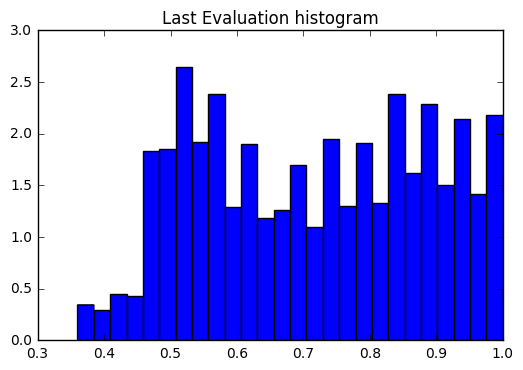

In [35]:
#Question # 2 For the variables in part 1, plot some histograms.

fig, axes = plt.subplots()
axes.hist(data.last_evaluation, normed = True, bins = 'auto')
axes.set_title('Last Evaluation histogram')

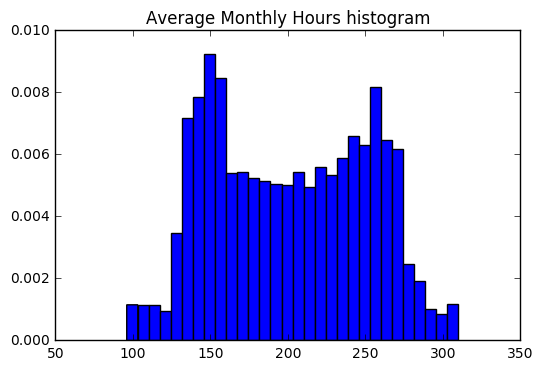

In [36]:
#Question # 2 For the variables in part 1, plot some histograms.

fig, axes = plt.subplots()
axes.hist(data.average_montly_hours, normed = True, bins = 'auto')
axes.set_title('Average Monthly Hours histogram')

In [40]:
#Question # 3 Compute the mean and variance for each of the variables used in parts 1 and 2.

mean_satisfaction = data.satisfaction_level.mean()
print('Mean of Satisfaction Level is ', mean_satisfaction)

mean_eval = data.last_evaluation.mean()
print('Mean of last evaluation is ', mean_eval)

mean_avg_hrs = data.average_montly_hours.mean()
print('Mean of average monthly hours is ', mean_avg_hrs)

var_satisfaction = data.satisfaction_level.var()
print('Variance of Satisfaction Level is ', var_satisfaction)

var_eval = data.last_evaluation.var()
print('Variance of last evaluation is ', var_eval)

var_avg_hrs = data.average_montly_hours.var()
print('Variance of average monthly hours is ', var_avg_hrs)


Mean of Satisfaction Level is  0.6128335222348166
Mean of last evaluation is  0.7161017401159978
Mean of average monthly hours is  201.0503366891126
Variance of Satisfaction Level is  0.061817200647087255
Variance of last evaluation is  0.02929886443156327
Variance of average monthly hours is  2494.313174809979


In [54]:
mean = var_nor.mean()
print(mean)

satisfaction_level        0.612834
last_evaluation           0.716102
average_montly_hours    201.050337
dtype: float64


In [47]:
#Question # 4 Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part one. 
#Are they well approximated by normals?
mu, std = norm.fit(data.satisfaction_level)
print(mu, std)

0.612833522235 0.248622362682


In [50]:
std = var_nor.std()
print(std)

satisfaction_level       0.248631
last_evaluation          0.171169
average_montly_hours    49.943099
dtype: float64


In [62]:
#Question # 4 Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part one. 
#Are they well approximated by normals?

var_nor = data[['satisfaction_level','last_evaluation','average_montly_hours']]
normal = {}
x = {}
for col in var_nor:
    normal[col] = norm(loc = mean[col], scale = std[col])
    x[col] = np.linspace(normal[col].ppf(0.01),normal[col].ppf(0.99), 100)


TypeError: 'dict' object is not callable

KeyError: 'satisfaction_level'

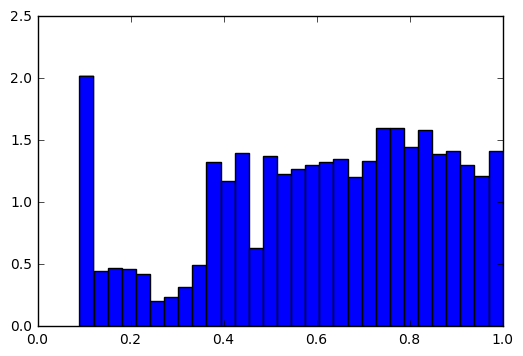

In [64]:
fig, axes = plt.subplots()
axes.hist(data.satisfaction_level, normed = True, bins = 'auto')
axes.plot(x['satisfaction_level'], normal['satisfaction_level'].pdf(x['satisfaction_level']))
axes.set_title('Satisfaction Level histogram')

axes.hist(data.last_evaluation, normed = True, bins = 'auto')
axes.plot(x['last_evaluation'], normal['last_evaluation'].pdf(x['last_evaluation']))
axes.set_title('Last evaluation histogram')

axes.hist(data.average_montly_hours, normed = True, bins = 'auto')
axes.plot(x['average_montly_hours'], normal['average_montly_hours'].pdf(x['average_montly_hours']))
axes.set_title('Average monthly hours histogram')